# TD - Pandas - MAtplotlib
A partir des données airbnb, répondez à ces questions en proposant à chaque fois une
visualisation avec seaborn ou matplotlib:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 100
df = pd.read_csv('listings.csv')
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,528022,https://www.airbnb.com/rooms/528022,20221205143541,2022-12-05,city scrape,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,https://www.airbnb.com/users/show/2594559,Els,2012-06-10,"Amsterdam, Netherlands",NaN,within a day,87%,96%,f,https://a0.muscache.com/im/pictures/user/98c88...,https://a0.muscache.com/im/pictures/user/98c88...,Spaarndammer en Zeeheldenbuurt,1,1,"['email', 'phone']",t,t,NaN,Westerpark,NaN,52.39114,4.88846,Private room in boat,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Dishes and silverware"", ""Hange...",$100.00,2,30,2,2,30,30,2.0,30.0,NaN,t,4,16,29,212,2022-12-05,248,37,3,2016-10-06,2022-11-28,4.85,4.88,4.83,4.93,4.90,4.78,4.72,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.30
1,2818,https://www.airbnb.com/rooms/2818,20221205143541,2022-12-05,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Books and reading material"", ""Smoke alarm"", ...",$59.00,3,28,3,3,1125,1125,3.0,1125.0,NaN,t,6,27,27,27,2022-12-05,314,29,1,2009-03-30,2022-11-06,4.89,4.93,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.88
2,20168,https://www.airbnb.com/rooms/20168,20221205143541,2022-12-05,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,3,5,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Hangers"", ""Wifi...",$106.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2022-12-05,339,0,0,2010-03-02,2020-04-09,4.44,4.69,4.79,4.63,4.6

## 1 Calculez le nombre d’host et le nombre de review par quartier (neighbourhood_cleansed)?

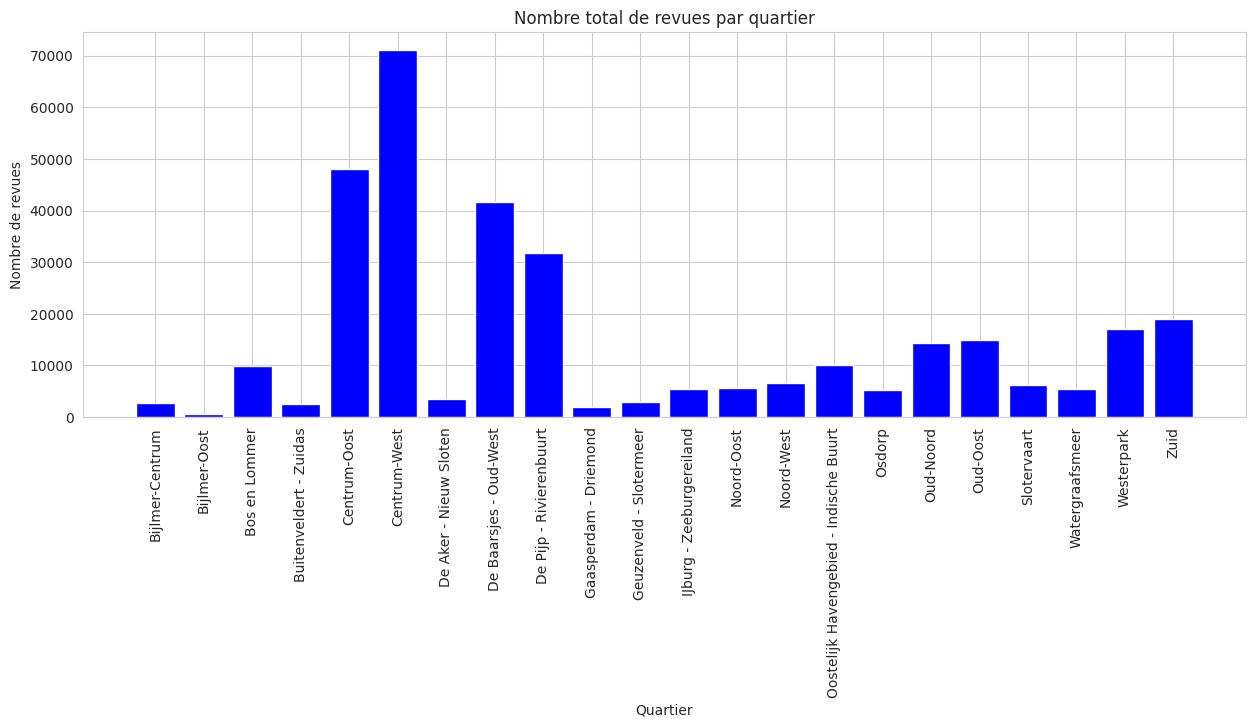

In [30]:
# Grouper les données par quartier
reviews = df.groupby('neighbourhood_cleansed').agg({'number_of_reviews': 'sum'})

# Initialiser la figure et les axes
fig, ax = plt.subplots(figsize=(15, 5))

# Créer le graphique à barres
ax.bar(reviews.index, reviews['number_of_reviews'], color='blue')

# Ajouter le titre et les labels d'axes
ax.set_title('Nombre total de revues par quartier')
ax.set_xlabel('Quartier')
ax.set_ylabel('Nombre de revues')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

Le graphique montre le nombre total de revues par quartier à Amsterdam. Il permet de visualiser les quartiers les plus populaires en termes de nombre de revues.

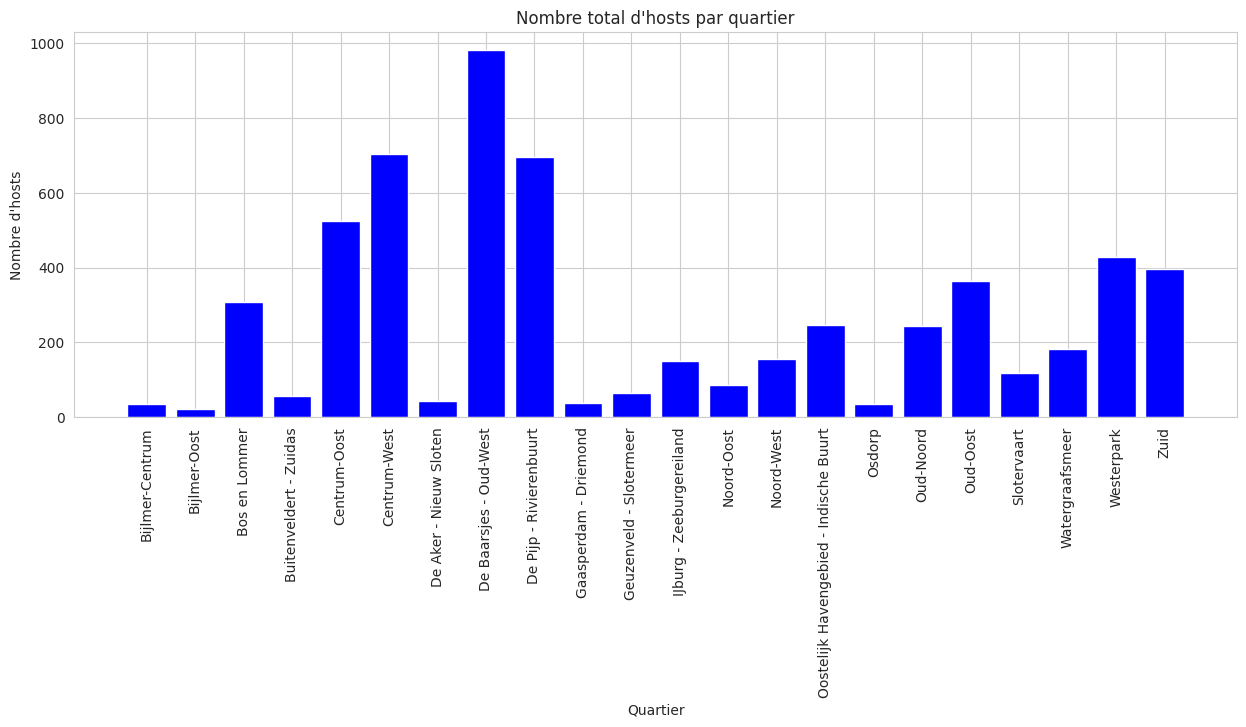

In [34]:
host_id = df.groupby('neighbourhood_cleansed').agg({'host_id': 'nunique'})

# Initialiser la figure et les axes
fig, ax = plt.subplots(figsize=(15, 5))

# Créer le graphique à barres
ax.bar(reviews.index, host_id['host_id'], color='blue')

# Ajouter le titre et les labels d'axes
ax.set_title("Nombre total d'hosts par quartier")
ax.set_xlabel('Quartier')
ax.set_ylabel("Nombre d'hosts")
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

Le graphique montre le nombre total d'hôtes par quartier à Amsterdam. On peut voir que le quartier le plus peuplé en termes d'hôtes est De Baarsjes - Oud-West suivi de près par Oud-Oost et Westerpark. Les quartiers de Bijlmer-Centrum et Bijlmer-Oost ont le moins d'hôtes.

## 2. Quels sont les pourcentage d’acceptation et de réponse moyen des hosts?

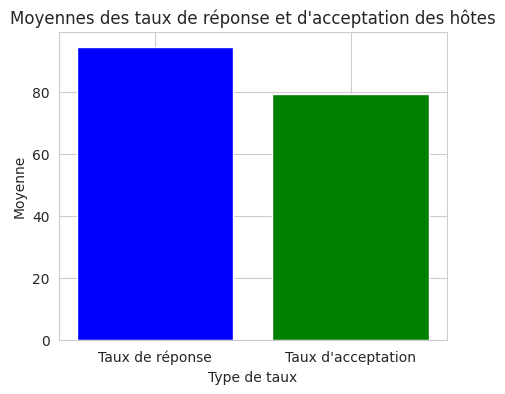

In [36]:
# Nettoyer les données
df[['host_response_rate', 'host_acceptance_rate']] = df[['host_response_rate', 'host_acceptance_rate']].replace('%', '', regex=True).astype(float)

# Calculer les moyennes
moyennes = df[['host_response_rate', 'host_acceptance_rate']].mean()

# Initialiser la figure et les axes
fig, ax = plt.subplots(figsize=(5, 4))

# Créer le graphique à barres
colors = ['blue', 'green']
ax.bar(['Taux de réponse', 'Taux d\'acceptation'], moyennes, color=colors)

# Ajouter le titre et les labels d'axes
ax.set_title('Moyennes des taux de réponse et d\'acceptation des hôtes')
ax.set_xlabel('Type de taux')
ax.set_ylabel('Moyenne')

# Afficher le graphique
plt.show()


On peut déduire que les hôtes ont un taux de réponse moyen de 94,67% et un taux d'acceptation moyen de 79,58%. Ces informations peuvent être utiles pour les invités qui cherchent à réserver un logement car elles donnent une idée de la probabilité de recevoir une réponse de l'hôte et de voir leur demande de réservation acceptée.

##  3. Quel pourcentage des hosts on une vérification:
- ○ par téléphone
- ○ par email
- ○ par email pro

In [57]:
df = pd.read_csv('listings.csv')
df['host_verifications'] = df['host_verifications'].apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
verifications = df['host_verifications'].explode()
verifications = verifications.str.strip()
verifications = verifications.value_counts()
verifications

phone           6778
email           6329
work_email       856
                  22
photographer       1
Name: host_verifications, dtype: int64

In [6]:
phone_verifications = verifications['phone']
email_verifications = verifications['email']
work_verifications = verifications['work_email']
total_verifications = phone_verifications + email_verifications + work_verifications

phone_pourcentage = (phone_verifications / total_verifications) * 100
email_pourcentage = (email_verifications / total_verifications) * 100
work_pourcentage = (work_verifications / total_verifications) * 100

verification_pourcentages = {
    'par téléphone': phone_pourcentage,
    'email': email_pourcentage,
    'email pro': work_pourcentage,
}

verification_pourcentages_df = pd.DataFrame(verification_pourcentages, index=['Pourcentage (%)'])
verification_pourcentages_df


,par téléphone,email,email pro
Pourcentage (%),48.542577,45.326935,6.130488


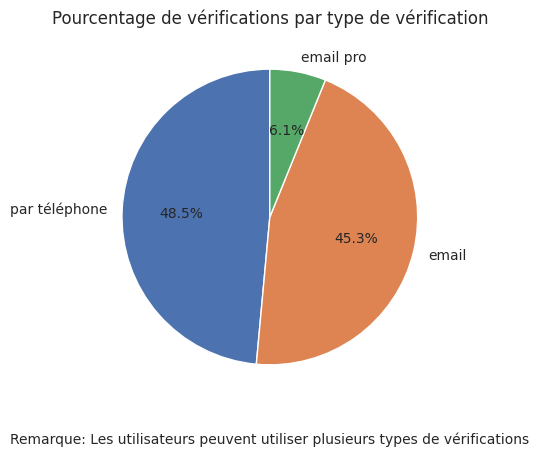

In [56]:
verification_pourcentages = [phone_pourcentage, email_pourcentage, work_pourcentage]
labels = ['par téléphone', 'email', 'email pro']

fig, ax = plt.subplots()
ax.set_title('Pourcentage de vérifications par type de vérification')
ax.pie(verification_pourcentages, labels=labels, autopct='%1.1f%%', startangle=90)

# Ajouter le texte en bas du graphique
ax.text(0.5, -0.1, 'Remarque: Les utilisateurs peuvent utiliser plusieurs types de vérifications', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.show()

En se basant sur le graphique, on peut déduire que :
 - 48,5% des hôtes ont une vérification par téléphone
 - 45,3% ont une vérification par email
 - 6,1% ont une vérification par email professionnel.

Il est important de noter que ces pourcentages ne sont pas indépendants ce qui signifie qu'un même hôte peut avoir effectué des vérifications par téléphone et par email en même temps.

##  4.En fonction du room type, calculez le nombre moyen d’ “amenities”son écart type.

In [8]:
# Charger les données depuis le fichier CSV
df = pd.read_csv('listings.csv')

# Diviser les valeurs de la colonne 'amenities' en une liste d'éléments, puis les convertir en une série exploitable
df['amenities'] = df['amenities'].apply(lambda x: x.replace('"', '').split(","))
amenities = df['amenities'].explode()

# Supprimer les espaces blancs autour de chaque élément
amenities = amenities.str.strip()

# Compter le nombre d'occurrences de chaque élément
amenities_count = amenities.value_counts()

# Regrouper les données par type de chambre
groupe_room_type = df.groupby('room_type')

# Calculer le nombre moyen d'amenities pour chaque type de chambre
amenities_groupe = groupe_room_type['amenities'].agg(lambda x: x.str.len().mean())

# Calculer l'écart type des nombre d'amenities pour chaque type de chambre
amenities_groupe_std = groupe_room_type['amenities'].agg(lambda x: x.str.len().std())

# Fusionner les résultats dans un dataframe
df_results = pd.concat([amenities_groupe, amenities_groupe_std], axis=1)

# Renommer les colonnes pour plus de clarté
df_results.columns = ['moyenne d\'amenities', 'écart type']

# Afficher le résultat final
df_results

,moyenne d'amenities,écart type
room_type,,
Entire home/apt,31.551731,15.294251
Hotel room,23.774194,10.589849
Private room,27.451613,13.715880
Shared room,14.641026,8.904426


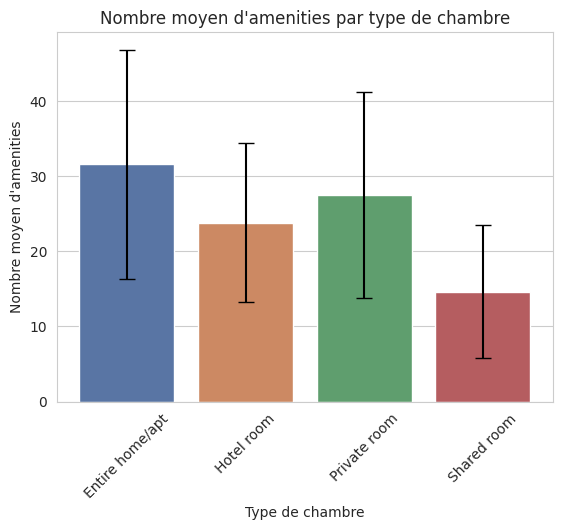

In [28]:
# Créer un graphique avec seaborn
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.barplot(x=df_results.index, y='moyenne d\'amenities', data=df_results)

# Ajouter les barres d'erreur
plt.errorbar(x=df_results.index, y=df_results['moyenne d\'amenities'], yerr=df_results['écart type'], fmt='none', c='black', capsize=6)

# Personnaliser le graphique
plt.title('Nombre moyen d\'amenities par type de chambre')
plt.xlabel('Type de chambre')
plt.ylabel('Nombre moyen d\'amenities')
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

En regardant différentes sortes de chambre on remarque que les maisons entières ont généralement plus de trucs en plus que les autres types de chambres .Cependant cela ne veut pas dire que toutes les maisons entières ont plus de trucs en plus que les autres types de chambres. En fait, il y a de la variation ce qui signifie que certaines maisons entières peuvent avoir moins de trucs en plus que d'autres types de chambres. Mais, en général les maisons entières ont plus de trucs en plus que les autres types de chambres.

##  5. Quel est le prix median par type de room, le maximum, le minimum, le premier et le troisième quartile?

In [9]:
# Charger les données à partir d'un fichier CSV
df = pd.read_csv('listings.csv')

# Regrouper les données par type de chambre
groupe = df.groupby('room_type')

# Nettoyer les données de la colonne "price" en enlevant les symboles inutiles ($ et ,)
df['price'] = df['price'].apply(lambda x: x.replace('$', '').replace(',', ''))
# Convertir les prix en valeurs numériques de type float
df['price'] = df['price'].astype(float)

# Calculer les statistiques de prix pour chaque type de chambre
prix_median = groupe['price'].median()  # le prix médian
prix_max = groupe['price'].max()  # le prix maximum
prix_min = groupe['price'].min()  # le prix minimum
prix_premier_quartile = groupe['price'].quantile(0.25)  # le premier quartile de prix (25ème percentile)
prix_troisieme_quartile = groupe['price'].quantile(0.75)  # le troisième quartile de prix (75ème percentile)

# Mettre les statistiques de prix dans un tableau pandas
prix = pd.DataFrame({
    'prix_min': prix_min,
    'prix_premier_quartile': prix_premier_quartile,
    'prix_median': prix_median,
    'prix_troisieme_quartile': prix_troisieme_quartile,
    'prix_max': prix_max,
})

# Afficher le tableau des statistiques de prix
prix

,prix_min,prix_premier_quartile,prix_median,prix_troisieme_quartile,prix_max
room_type,,,,,
Entire home/apt,20.0,150.0,200.0,294.00,7900.0
Hotel room,0.0,116.5,146.0,185.25,800.0
Private room,24.0,91.0,122.0,166.00,71536.0
Shared room,30.0,42.0,50.0,84.50,500.0


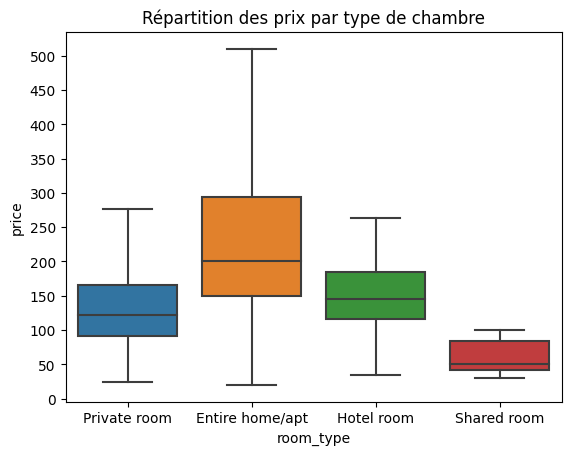

In [10]:
# Charger les données
df = pd.read_csv('listings.csv')

# Transformer le prix en float
df['price'] = df['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)

# Créer un graphique boxplot avec seaborn
sns.boxplot(x='room_type', y='price', data=df , showfliers=False)

# Ajouter un titre
plt.title('Répartition des prix par type de chambre')

# Définir les étiquettes de l'axe y
plt.yticks(np.arange(0, 550, 50))

# Afficher le graphique
plt.show()

Le tableau montre le prix médian, le prix minimum, le prix maximum et les quartiles de prix pour chaque type de chambre. Les logements entiers ont en moyenne les prix les plus élevés, suivis des chambres d'hôtel, des chambres privées et des chambres partagées.

##  6. Combien y-a-t-il d’annonces par valeur de salle de bain? (0.5 / 1 / 1.5 ….)?

In [23]:
df = pd.read_csv('listings.csv')
df['bathrooms_text']


0              1.5 baths
1       1.5 shared baths
2         1 private bath
3              1.5 baths
4          1 shared bath
              ...       
6804      1 private bath
6805              1 bath
6806              1 bath
6807      1 private bath
6808           1.5 baths
Name: bathrooms_text, Length: 6809, dtype: object

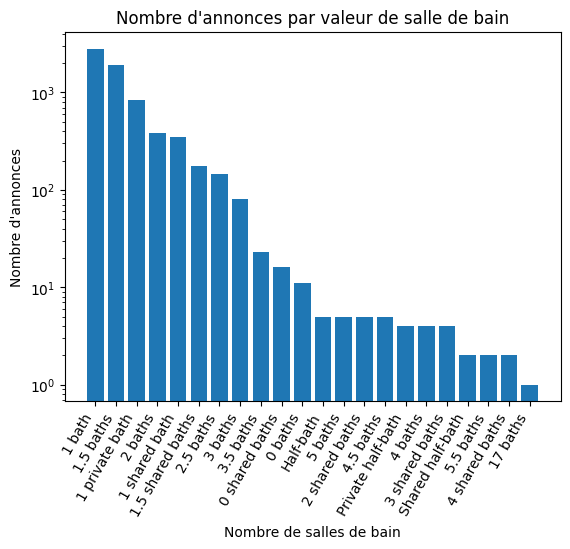

In [12]:
bathroom_counts = df['bathrooms_text'].value_counts()
# Créer un histogramme avec les décomptes
plt.bar(bathroom_counts.index, bathroom_counts.values)

# Ajouter des labels et un titre
plt.xlabel('Nombre de salles de bain')
plt.ylabel('Nombre d\'annonces')
plt.title('Nombre d\'annonces par valeur de salle de bain')

# Modifier la rotation des labels sur l'axe x
plt.xticks(rotation=60, ha='right')
# Changer l'échelle de l'axe y en logarithmique
plt.yscale('log')

# Afficher le graphique
plt.show()

Le tableau montre le nombre d'annonces pour différents types de salles de bain, comme "1 bain", "1.5 bains", "2 bains", etc. L'analyse en graphique montre qu'il y a beaucoup plus d'annonces avec 1 bain ou 1,5 bain que pour les autres types de salles de bain.

In [13]:
bathroom_counts

1 bath               2820
1.5 baths            1917
1 private bath        837
2 baths               381
1 shared bath         349
1.5 shared baths      177
2.5 baths             146
3 baths                80
3.5 baths              23
0 shared baths         16
0 baths                11
Half-bath               5
5 baths                 5
2 shared baths          5
4.5 baths               5
Private half-bath       4
4 baths                 4
3 shared baths          4
Shared half-bath        2
5.5 baths               2
4 shared baths          2
17 baths                1
Name: bathrooms_text, dtype: int64

##  7. Si on considère qu’un "bath" vaut 1, qu’une bath shared et une half-bath vaut 0.5 et qu’un private bath vaut 2. (2 half bath vaut donc 1)

In [14]:
df = pd.read_csv('listings.csv')
mapping = {
    '1 bath': 1, # 1 salle de bain
    '1.5 baths': 1.5, # 1.5 salles de bain
    '1 private bath': 2, # 1 salle de bain privée
    '2 baths': 2, # 2 salles de bain
    '1 shared bath': 0.5, # 1 salle de bain partagée
    '1.5 shared baths': 0.75,   # 1.5 salles de bain partagées
    '2.5 baths': 2.5, # 2.5 salles de bain
    '3 baths': 3, # 3 salles de bain
    '3.5 baths': 3.5, # 3.5 salles de bain
    '0 shared baths': 0, # 0 salle de bain partagée
    '0 baths': 0, # 0 salle de bain
    'Half-bath': 0.5, # 0.5 salle de bain
    '5 baths': 5, # 5 salles de bain
    '2 shared baths': 1, # 2 salles de bain partagées
    '4.5 baths': 4.5, # 4.5 salles de bain
    'Private half-bath': 1, # 0.5 salle de bain privée
    '4 baths': 4, # 4 salles de bain
    '3 shared baths': 1.5, # 3 salles de bain partagées
    'Shared half-bath': 0.5, # 0.5 salle de bain partagée
    '5.5 baths': 5.5, # 5.5 salles de bain
    '4 shared baths': 2, # 4 salles de bain partagées
    '17 baths': 17 # 17 salles de bain
}
df['bathrooms_text'] = df['bathrooms_text'].str.strip().map(mapping)
counts  = df['bathrooms_text'].value_counts()
counts

1.00     2829
1.50     1921
2.00     1220
0.50      356
0.75      177
2.50      146
3.00       80
0.00       27
3.50       23
5.00        5
4.50        5
4.00        4
5.50        2
17.00       1
Name: bathrooms_text, dtype: int64

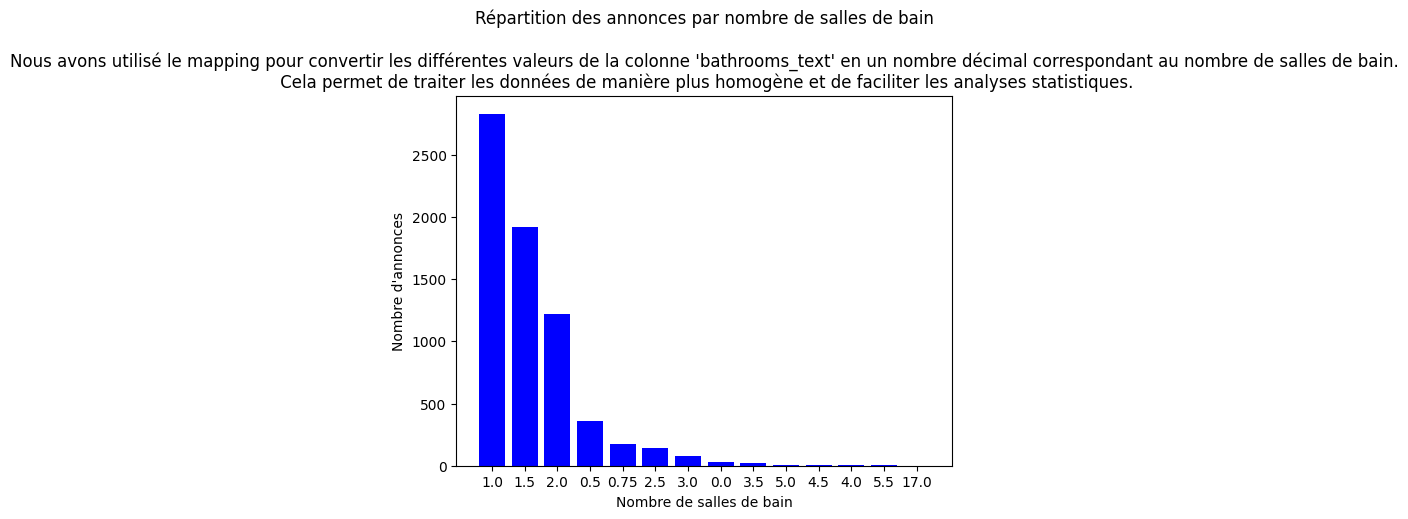

In [15]:
plt.bar(counts.index.astype(str), counts.values, color='blue')
plt.xlabel('Nombre de salles de bain')
plt.ylabel('Nombre d\'annonces')
plt.title("Répartition des annonces par nombre de salles de bain\n\nNous avons utilisé le mapping pour convertir les différentes valeurs de la colonne 'bathrooms_text' en un nombre décimal correspondant au nombre de salles de bain.\n Cela permet de traiter les données de manière plus homogène et de faciliter les analyses statistiques.")
plt.show()

### 
En utilisant le mapping fourni pour convertir les différentes valeurs de la colonne 'bathrooms_text' en un nombre décimal correspondant au nombre de salles de bain, nous avons pu obtenir une répartition des annonces en fonction du nombre de salles de bain. On constate que la plupart des annonces ont 1 salle de bain (2829), suivi de 1.5 salle de bain (1921) et 2 salles de bain (1220). On observe également que le nombre de salles de bain peut varier considérablement avec une annonce ayant jusqu'à 17 salles de bain.

- 1 bath' : 1 - Cela signifie qu'il y a une salle de bain dans la propriété.
- 1.5 baths' : 1,5 - Cela signifie qu'il y a une salle de bains complète dans la propriété, ainsi qu'une autre salle de bains (toilettes et lavabo).
- 1 bain privé : 2 - Cela signifie qu'il y a une salle de bains privée dans la propriété (accessible uniquement depuis une chambre), qui compte pour deux salles de bains au total.
- 2 bains' : 2 - Cela signifie qu'il y a deux salles de bains complètes dans la propriété.
- 1 salle de bain partagée : 0,5 - Cela signifie qu'il y a une salle de bain complète dans la propriété, mais qu'elle est partagée avec d'autres personnes et qu'elle ne compte que pour la moitié d'une salle de bain.
- 1,5 salle de bain partagée' : 0,75 - Cela signifie qu'il y a une salle de bains complète et une salle d'eau dans la propriété, mais qu'elles sont toutes deux partagées. Elles ne comptent donc que pour 0,5 salle de bains chacune, soit un total de 0,75 salle de bains.
- 2,5 salles de bains' : 2,5 - Cela signifie qu'il y a deux salles de bains complètes dans la propriété, ainsi qu'une autre salle de douche (toilettes et lavabo).
- 3 salles de bains' : 3 - Cela signifie qu'il y a trois salles de bains complètes dans la propriété.
- 3,5 salles de bains' : 3,5 - Cela signifie qu'il y a trois salles de bains complètes dans la propriété, ainsi qu'une autre salle de bains (toilettes et lavabo).
- 0 salle de bains partagée' : 0 - Cela signifie qu'il n'y a pas de salle de bains complète dans la propriété, mais uniquement des salles de bains partagées.
- 0 bains' : 0 - Cela signifie qu'il n'y a pas de salle de bains complète ou de salle d'eau dans la propriété.
- Half-bath' : 0,5 - Cela signifie qu'il y a une salle de douche dans la propriété (toilettes et lavabo), mais pas de salle de bains complète.
- 5 salles de bains : 5 - Cela signifie qu'il y a cinq salles de bains complètes dans la propriété.
- 2 salles de bains partagées' : 1 - Cela signifie qu'il y a deux salles de bains complètes dans la propriété, mais qu'elles sont partagées avec d'autres personnes, donc elles ne comptent que pour une demi-salle de bains chacune, pour un total d'une salle de bains.
- 4,5 salles de bains" : 4,5 - Cela signifie qu'il y a quatre salles de bains complètes dans la propriété, ainsi qu'une autre salle de douche (toilettes et lavabo).
Demi-salle de bains privée" : 1 - Il s'agit d'une demi-salle de bains privée, c'est-à-dire qu'elle n'est pas partagée avec d'autres personnes et qu'elle n'est accessible que depuis une chambre ou une pièce à vivre spécifique.
- 4 salles de bains" : 4. Il s'agit d'une propriété qui possède quatre salles de bains complètes, chacune contenant des toilettes, un lavabo et une douche ou une baignoire.
- 3 salles de bains communes" : 1.5. Il s'agit d'une propriété qui possède trois salles de bains complètes, dont chacune est partagée par plusieurs personnes. Dans ce cas, chaque salle de bains partagée est comptée pour 0,5.
- Demi-salle de bain partagée' : 0,5. Il s'agit d'une demi-salle de bains partagée par plusieurs personnes, ce qui signifie qu'elle est accessible à tous les occupants de la propriété et qu'elle n'est pas considérée comme privée.
- 5,5 salles de bains" : 5.5. Il s'agit d'une propriété qui possède cinq salles de bains complètes, ainsi qu'une demi-salle de bains supplémentaire.
- 4 salles de bains partagées" : 2. Il s'agit d'une propriété qui possède quatre salles de bains complètes, chacune étant partagée par plusieurs personnes. Dans ce cas, chaque salle de bains partagée est comptée pour 0,5.
- 17 salles de bains : 17. Il s'agit d'une propriété qui possède un nombre incroyable de 17 salles de bains complètes.

##  8. Il y a t’il une corrélation entre le nombre de reviews et la taille de la description entermes de nombre de caractères?

In [52]:
df = pd.read_csv('listings.csv')
df['description_length'] = df['description'].str.len()
corr = df[['number_of_reviews', 'description_length']].corr()
corr

,number_of_reviews,description_length
number_of_reviews,1.00000,0.20059
description_length,0.20059,1.00000


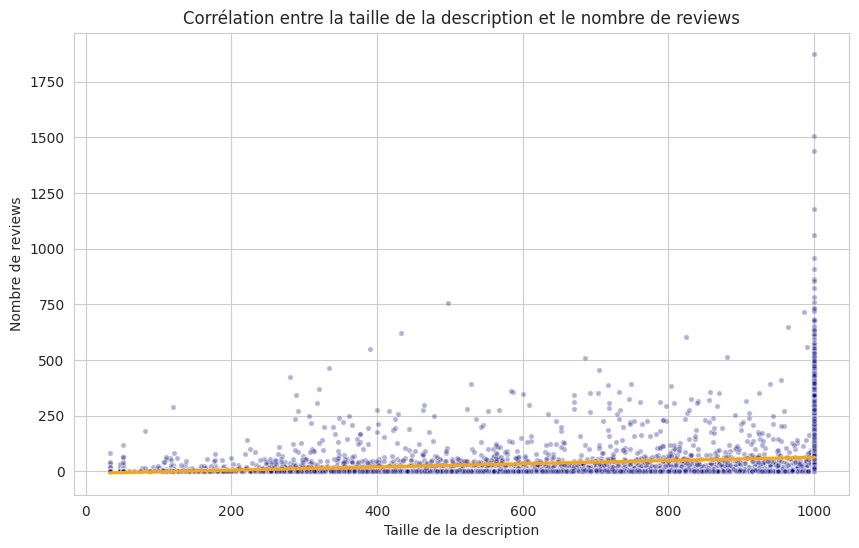

In [54]:
# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer le scatter plot avec une régression linéaire
sns.regplot(x="description_length", y="number_of_reviews", data=df, ax=ax, 
            scatter_kws={'alpha':0.3, 's': 15, 'color': 'navy', 'edgecolor': 'white'},
            line_kws={'color':'orange'})

# Ajouter des labels et un titre
ax.set_xlabel('Taille de la description')
ax.set_ylabel('Nombre de reviews')
ax.set_title('Corrélation entre la taille de la description et le nombre de reviews')

# Afficher le graphique
plt.show()

Le tableau de corrélation montre une corrélation positive faible entre le nombre de reviews et la taille de la description en termes de nombre de caractères. Le graphique de dispersion confirme cette tendance avec une régression linéaire montrant une pente positive mais faible.

##  9. On suspecte des faux commentaires. 
Pour identifier cela on regarde les séjours où le
nom de l’host est le même que le nom du reviewer. Quel est ce pourcentage général
de séjour où le nom de l'host est identique au nom du reviewer?

In [47]:
# Importer les données des fichiers listings.csv et reviews.csv dans des DataFrames
df_list = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

# Fusionner les deux DataFrames en fonction de la colonne 'id' dans listings.csv et 'listing_id' dans reviews.csv
tableau_fusionne = pd.merge(df_list, df_reviews, left_on='id', right_on='listing_id')

# Ajouter une colonne 'host_egale_review' qui est True si le nom de l'hôte est identique au nom du reviewer, False sinon
tableau_fusionne['host_egale_review'] = tableau_fusionne['host_name'] == tableau_fusionne['reviewer_name']

# Calculer le nombre de séjours où le nom de l'hôte est identique au nom du reviewer
somme = tableau_fusionne['host_egale_review'].sum()

# Calculer le nombre total de séjours
ligne = tableau_fusionne.shape[0]

# Calculer le pourcentage de séjours où le nom de l'hôte est identique au nom du reviewer
pourcentage = (somme / ligne) * 100

# Afficher le pourcentage
pourcentage

0.05017853154363238

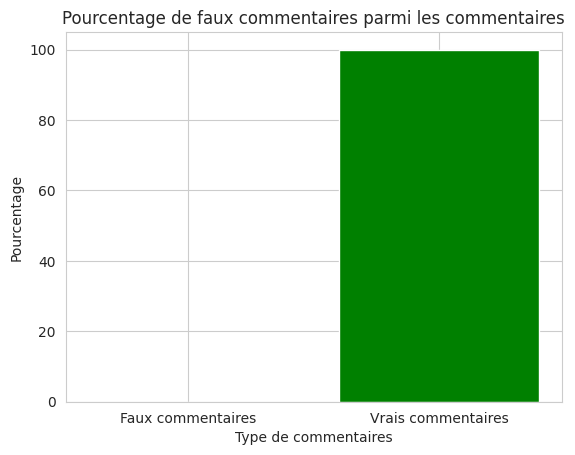

In [50]:
fig, ax = plt.subplots()

ax.bar(['Faux commentaires', 'Vrais commentaires'], [pourcentage, 100 - pourcentage], color=['red', 'green'])

ax.set_xlabel('Type de commentaires')
ax.set_ylabel('Pourcentage')
ax.set_title('Pourcentage de faux commentaires parmi les commentaires')

plt.show()

Le pourcentage général de séjours où le nom de l'hôte est identique au nom du reviewer est de 0.05%. Cela suggère qu'il y a très peu de faux commentaires.